In [1]:
import cv2 
import numpy as np 
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from PIL import Image
import random
import time
from scipy.signal import fftconvolve

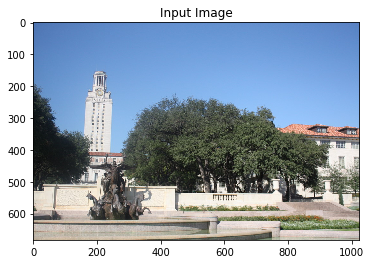

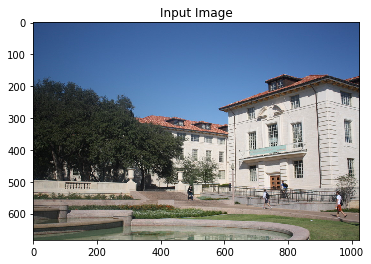

In [2]:
img = cv2.imread("uttower_left.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Input Image")
plt.show()
img2 = cv2.imread("uttower_right.jpg")
image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.title("Input Image")
plt.show()


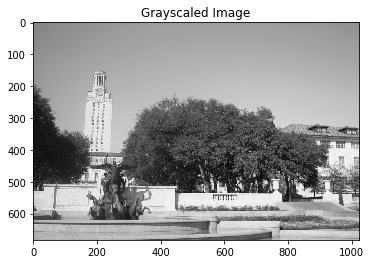

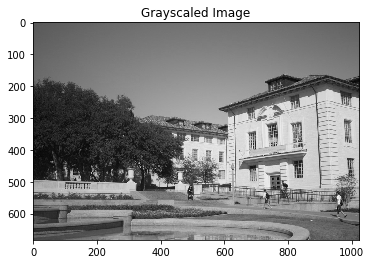

In [6]:
def grayscale_image(input_image, verbose = False):
    image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Grayscaled Image")
        plt.show()
    return image

grayscaled_image = grayscale_image(image, True)
grayscaled_image2 = grayscale_image(image2, True)

In [4]:
def NCC(trial, img):
    trial = trial - np.mean(trial)
    img = img - np.mean(img)
    a = np.ones(trial.shape)
    a_flipped = np.flipud(np.fliplr(trial))
    output = fftconvolve(img, a_flipped.conj(), mode="full")
    img = fftconvolve(np.square(img), a, mode="full") -  np.square(fftconvolve(img, a, mode="full")) / (np.prod(trial.shape))
    img[np.where(img< 0)] = 0
    trial = np.sum(np.square(trial))
    output = output / np.sqrt(img * trial)
    output[np.where(np.logical_not(np.isfinite(output)))] = 0
    
    return output

In [7]:
image_grayscaled =  cv2.cvtColor(grayscaled_image, cv2.COLOR_BGR2GRAY)
image2_grayscaled =  cv2.cvtColor(grayscaled_image2, cv2.COLOR_BGR2GRAY)
output_NCC = NCC(image2_grayscaled, image_grayscaled)

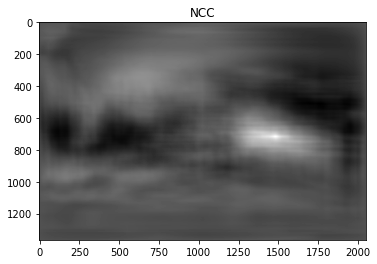

In [8]:
plt.imshow(output_NCC, cmap='gray')
plt.title("NCC")
plt.show()

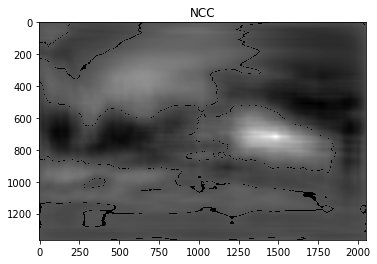

In [9]:
temp_NCC = np.copy(output_NCC)
for i in range(len(output_NCC)):
    for j in range(len(output_NCC[i])):
        temp_NCC[i][j] = abs(temp_NCC[i][j])
def smallest_indices(ary, n):
    flat = ary.flatten()
    indices = np.argpartition(flat, n)[:n]
    indices = indices[np.argsort(flat[indices])]
    return np.unravel_index(indices, ary.shape)
index = smallest_indices(temp_NCC, 50000)
pairs = []
for i in range(len(index[0])):
    pairs.append([index[0][i], index[1][i]])
temp_NCC_2 = np.copy(output_NCC)
for pair in pairs:
    temp_NCC_2[pair[0]][pair[1]] = np.amin(temp_NCC_2)
plt.imshow(temp_NCC_2, cmap='gray')
plt.title("NCC")
plt.show()

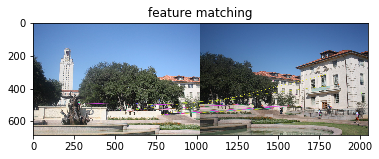

In [10]:
object1 = cv2.ORB_create(nfeatures=100)
point1, descript1 =object1.detectAndCompute(image, None)
point2, descript2 = object1.detectAndCompute(image2, None)

# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descript1, descript2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 20 matches
match_img = cv2.drawMatches(image, point1, image2, point2, matches[:20], None)

plt.imshow(match_img, cmap='gray')
plt.title("feature matching")
plt.show()